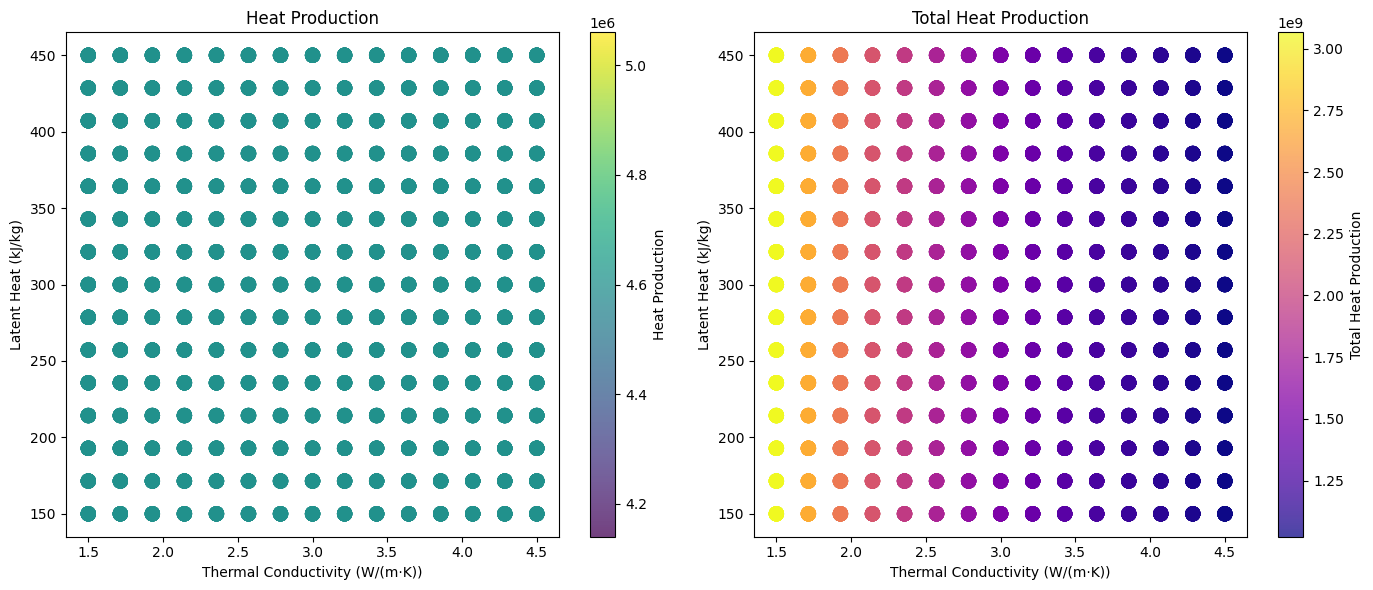

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholder for the integrated_geothermal_model function
def integrated_geothermal_model(flux, decay_rates, energy_released, thermal_conductivity, latent_heat, initial_temperature, boundary_temperature, length, cooling_rate):
    # Simplified example calculation
    heat_production = np.sum(flux) - np.sum(decay_rates)
    total_heat_production = heat_production * (length / thermal_conductivity)
    return heat_production, total_heat_production, None, None, None, None

def scenario_analysis(param_ranges):
    results = []
    for thermal_conductivity in param_ranges['thermal_conductivity']:
        for latent_heat in param_ranges['latent_heat']:
            for cooling_rate in param_ranges['cooling_rate']:
                heat_production, total_heat_production, _, _, _, _ = integrated_geothermal_model(
                    flux=np.array([1.2e6, 2.5e6, 0.9e6]),  # Example flux values in W/m^2
                    decay_rates=np.array([1.55e-11, 4.95e-12, 5.49e-11]),  # Example decay rates in s^-1
                    energy_released=np.array([2.85e-12, 2.67e-12, 1.31e-12]),  # Example energy release in J/kg
                    thermal_conductivity=thermal_conductivity,
                    latent_heat=latent_heat,
                    initial_temperature=5000,
                    boundary_temperature=100,
                    length=1000,
                    cooling_rate=cooling_rate
                )
                results.append({
                    'thermal_conductivity': thermal_conductivity,
                    'latent_heat': latent_heat,
                    'cooling_rate': cooling_rate,
                    'heat_production': heat_production,
                    'total_heat_production': total_heat_production
                })
    return results

def plot_results(results):
    # Extracting data for plotting
    thermal_conductivities = [result['thermal_conductivity'] for result in results]
    latent_heats = [result['latent_heat'] for result in results]
    heat_productions = [result['heat_production'] for result in results]
    total_heat_productions = [result['total_heat_production'] for result in results]

    # Plotting Heat Production
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    scatter = plt.scatter(thermal_conductivities, latent_heats, c=heat_productions, cmap='viridis', s=100, alpha=0.75)
    plt.xlabel('Thermal Conductivity (W/(m·K))')
    plt.ylabel('Latent Heat (kJ/kg)')
    plt.title('Heat Production')
    plt.colorbar(scatter, label='Heat Production')

    # Plotting Total Heat Production
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(thermal_conductivities, latent_heats, c=total_heat_productions, cmap='plasma', s=100, alpha=0.75)
    plt.xlabel('Thermal Conductivity (W/(m·K))')
    plt.ylabel('Latent Heat (kJ/kg)')
    plt.title('Total Heat Production')
    plt.colorbar(scatter, label='Total Heat Production')

    plt.tight_layout()
    plt.show()

# Expanded parameter ranges for more points
param_ranges = {
    'thermal_conductivity': np.linspace(1.5, 4.5, 15),  # More values from 1.5 to 4.5 W/(m·K)
    'latent_heat': np.linspace(150, 450, 15),  # More values from 150 to 450 kJ/kg
    'cooling_rate': np.linspace(0.01, 0.05, 15)  # More values from 0.01 to 0.05 °C/yr
}

# Run scenario analysis and plot results
results = scenario_analysis(param_ranges)
plot_results(results)